# Object Detection in Open CV

In [1]:
# Open image in openCv
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## 1. Template Matching 
* Matching part of image to big image 

In [2]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

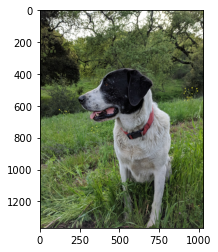

In [3]:
plt.imshow(full)

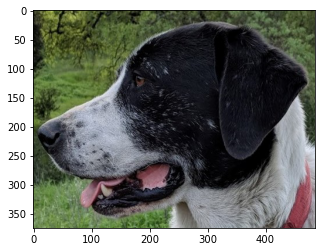

In [4]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

* Try to match the dog face to the full body picture
* Sliding the template picture in the big picture and calculate the distance, spotlight the the predict top left of th template picture inside the big picture
* See formular of six Template Matching Algorithm
"https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html"

In [5]:
# List of template matching algorithm
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

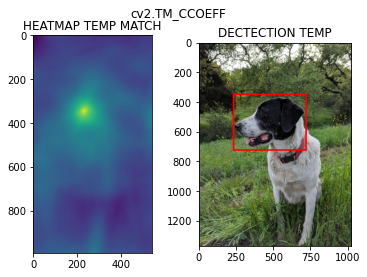

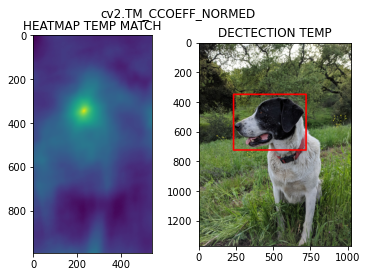

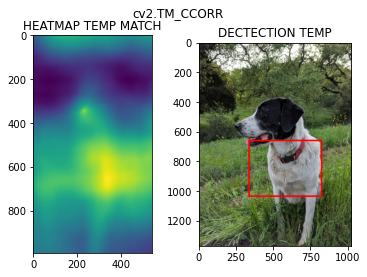

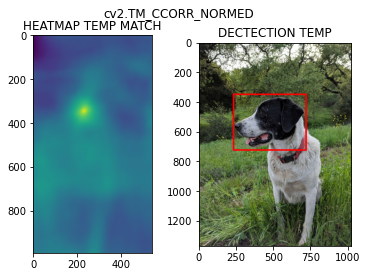

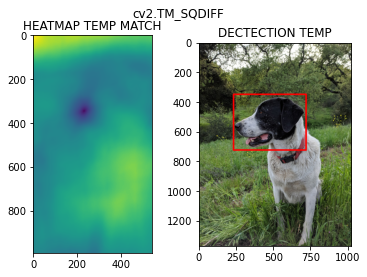

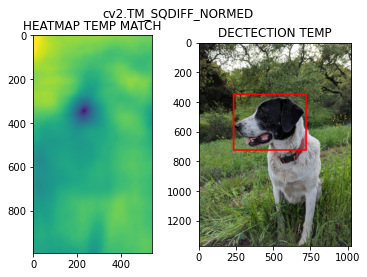

In [6]:
for m in methods:

    # Create copy of image so we not mess up the original
    full_copy = full.copy()
    method = eval(m) # use eval to change string to same name funtion/mehod

    #template matching
    # find the top left point of small picture in big picture
    res = cv2.matchTemplate(full_copy,face,method)
    # return the heatmap of template matching in array
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res) #find global max,min in array

    # with SQDIFF algorithm , the topeleft is the smallest value elss i is highest
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,channel = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #plot and show
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP TEMP MATCH')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DECTECTION TEMP')
    plt.suptitle(m)

    plt.show()


## 2. Corner Detection
* Find corner in image
* Finding corrner is not related to the color, so we should perform it in grayscale image

### 2.1 Harris corner algorithm
* See formular :"https://viblo.asia/p/ung-dung-thuat-toan-harris-corner-detector-trong-bai-toan-noi-anh-phan-i-ByEZkyME5Q0"
* When a anchor pixel is sliding at the corner, its intensity will change in every moving direction in contrst with moving on flat plane or edge
* cv2.cornerHarris()

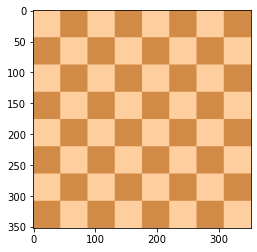

In [7]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

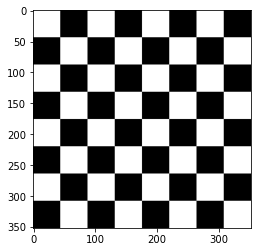

In [8]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

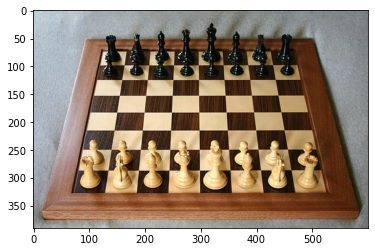

In [9]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

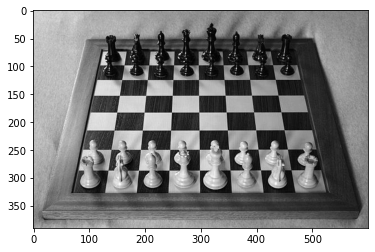

In [10]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [11]:
gray = np.float32(gray_flat_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None) # a denoise method which connect separate detail
flat_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(flat_chess)

In [15]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)
real_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(real_chess)

### 2.2 Shi-Tomashi Algorithm
* Same idea with Harris but different in formular "https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html"
* Using cv2.goodFeaturesToTrack()

In [17]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

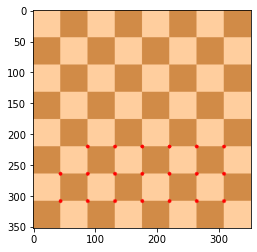

In [18]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,20,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)
plt.imshow(flat_chess)


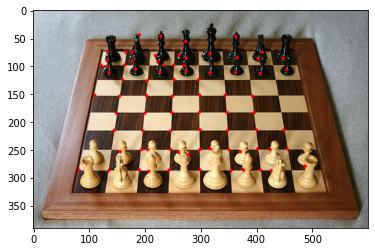

In [19]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)
plt.imshow(real_chess)

### 3. Edge Detection
* Canny Edge Detection Algorithm
* Formular: "https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html"
1. Apply filter to smooth the image
2. Find intensity gradient of image
* Find edge gradient of image, this gradient direction always perpendicular to the edge
3. Apply non-maxmum surpression 
* The point on the edge often a local maxmin point, check if the point is max or not
4. Use double threshold to check an detect edge is really edge orr not


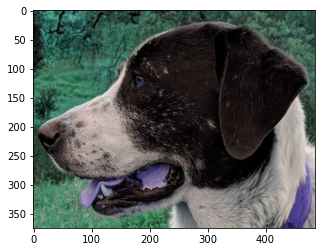

In [20]:
img = cv2.imread('DATA/sammy_face.jpg')
plt.imshow(img)

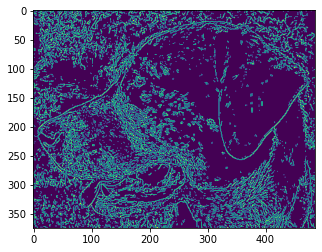

In [21]:
edges = cv2.Canny(image=img,threshold1 = 127, threshold2=127)
plt.imshow(edges)

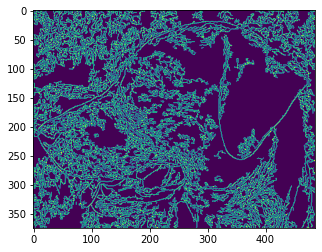

In [22]:
edges = cv2.Canny(image=img,threshold1 = 0, threshold2=255)
plt.imshow(edges)

In [23]:
med_val = np.median(img)
med_val

64.0

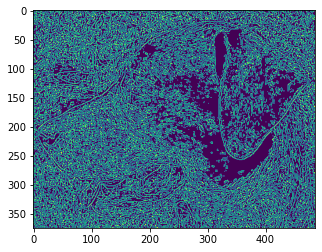

In [24]:
lower = int(max(0,0.7*med_val))
upper = int(min(255,0.7*med_val))
edges = cv2.Canny(image=img,threshold1 = lower, threshold2=upper)
plt.imshow(edges)

* Smooth the image by hand before apply Canny can bring better result

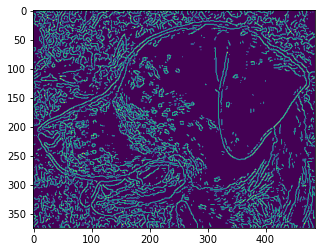

In [25]:
blurred_img = cv2.blur(img,ksize=(5,5))
edges = cv2.Canny(image=blurred_img,threshold1 = lower, threshold2=upper)
plt.imshow(edges)

### 4. Grid Detection
* cv2.findChessboardCorners() for grid
* cv2.findCircleGrid() for circle grid

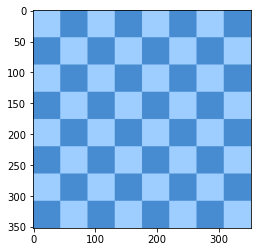

In [26]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
plt.imshow(flat_chess)

In [27]:
found,corners = cv2.findChessboardCorners(flat_chess,(7,7))
found

(True,
 array([[[ 43.500004,  43.500004]],
 
        [[ 87.5     ,  43.5     ]],
 
        [[131.5     ,  43.5     ]],
 
        [[175.5     ,  43.5     ]],
 
        [[219.5     ,  43.5     ]],
 
        [[263.5     ,  43.5     ]],
 
        [[307.5     ,  43.5     ]],
 
        [[ 43.499996,  87.50001 ]],
 
        [[ 87.5     ,  87.5     ]],
 
        [[131.5     ,  87.5     ]],
 
        [[175.5     ,  87.5     ]],
 
        [[219.5     ,  87.5     ]],
 
        [[263.5     ,  87.5     ]],
 
        [[307.5     ,  87.49999 ]],
 
        [[ 43.500004, 131.5     ]],
 
        [[ 87.5     , 131.5     ]],
 
        [[131.5     , 131.5     ]],
 
        [[175.5     , 131.5     ]],
 
        [[219.5     , 131.5     ]],
 
        [[263.5     , 131.5     ]],
 
        [[307.5     , 131.5     ]],
 
        [[ 43.499996, 175.5     ]],
 
        [[ 87.5     , 175.5     ]],
 
        [[131.5     , 175.5     ]],
 
        [[175.5     , 175.5     ]],
 
        [[219.5     , 175.5     ]],
 
     

In [28]:
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)
plt.imshow(flat_chess)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

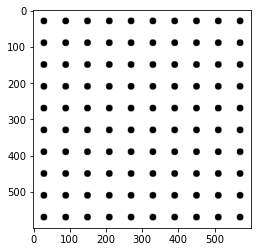

In [30]:
dots = cv2.imread('DATA/dot_grid.png')
plt.imshow(dots)

In [31]:
found,corners = cv2.findCirclesGrid(dots,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)
found

(True,
 array([[[ 29.5,  29.5]],
 
        [[ 89.5,  29.5]],
 
        [[149.5,  29.5]],
 
        [[209.5,  29.5]],
 
        [[269.5,  29.5]],
 
        [[329.5,  29.5]],
 
        [[389.5,  29.5]],
 
        [[449.5,  29.5]],
 
        [[509.5,  29.5]],
 
        [[569.5,  29.5]],
 
        [[ 29.5,  89.5]],
 
        [[ 89.5,  89.5]],
 
        [[149.5,  89.5]],
 
        [[209.5,  89.5]],
 
        [[269.5,  89.5]],
 
        [[329.5,  89.5]],
 
        [[389.5,  89.5]],
 
        [[449.5,  89.5]],
 
        [[509.5,  89.5]],
 
        [[569.5,  89.5]],
 
        [[ 29.5, 149.5]],
 
        [[ 89.5, 149.5]],
 
        [[149.5, 149.5]],
 
        [[209.5, 149.5]],
 
        [[269.5, 149.5]],
 
        [[329.5, 149.5]],
 
        [[389.5, 149.5]],
 
        [[449.5, 149.5]],
 
        [[509.5, 149.5]],
 
        [[569.5, 149.5]],
 
        [[ 29.5, 209.5]],
 
        [[ 89.5, 209.5]],
 
        [[149.5, 209.5]],
 
        [[209.5, 209.5]],
 
        [[269.5, 209.5]],
 
        [[329

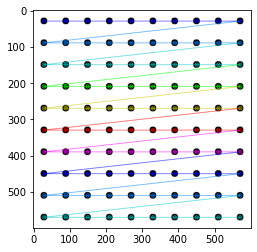

In [32]:
cv2.drawChessboardCorners(dots,(10,10),corners,found)
plt.imshow(dots)

### 5. Contour Detection
* Find contour of object in picture
* contours, hierarchy = cv2.findContours(binaryImage, typeofContour, methodofContour)
* cv2.drawContours(image, contours, contourIndex, colorCode, thickness)

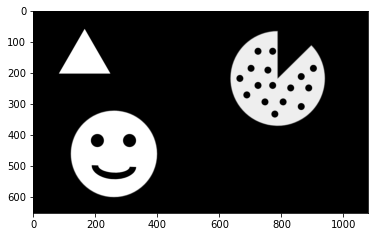

In [33]:
img = cv2.imread('DATA/internal_external.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

In [34]:
contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(type(contours),len(contours),type(hierarchy))

<class 'tuple'> 22 <class 'numpy.ndarray'>


In [35]:
external_contours = np.zeros(img.shape)

In [36]:
for i in range(len(contours)):

    # external contour
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(external_contours,contours,i,255,-1)

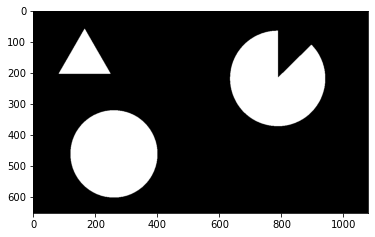

In [37]:
plt.imshow(external_contours,cmap='gray')

In [38]:
internal_contours = np.zeros(img.shape)
for i in range(len(contours)):

    # external contour
    if hierarchy[0][i][3]!=-1:
        cv2.drawContours(internal_contours,contours,i,255,-1)

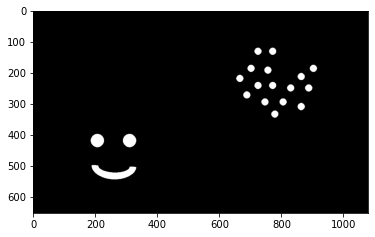

In [39]:
plt.imshow(internal_contours,cmap='gray')

### 6. Feature Matching
* Brute- Force Matching ORB
* Brute-Force Matching SIFT
* FLANN base Matcher


In [40]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')


In [41]:
reese = cv2.imread('DATA/reeses_puffs.png',0)

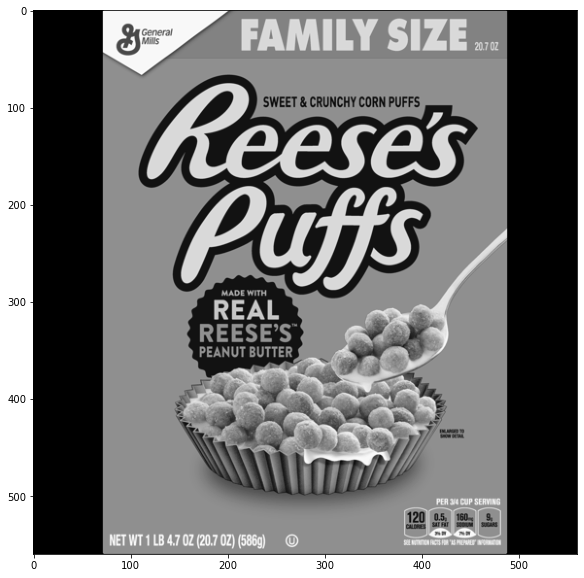

In [42]:
display(reese)

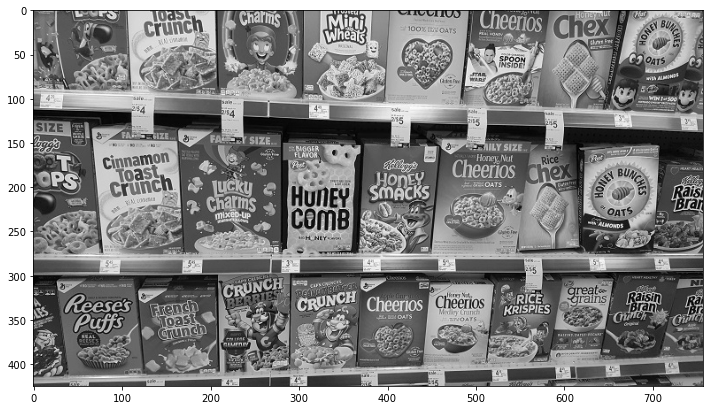

In [43]:
cereals = cv2.imread('DATA/many_cereals.jpg',0)
display(cereals)

In [44]:
orb = cv2.ORB_create()
kp1,des1 = orb.detectAndCompute(reese,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [45]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches,key = lambda x:x.distance)

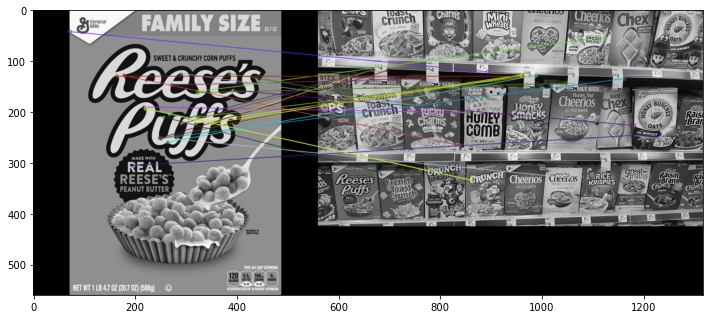

In [46]:
reese_matches = cv2.drawMatches(reese,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reese_matches)

In [47]:
sift = cv2.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reese,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [48]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)


In [49]:
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
len(good) ,len(matches)

(79, 1501)

In [50]:
sift_matches = cv2.drawMatchesKnn(reese,kp1,cereals,kp2,good,None,flags=2)

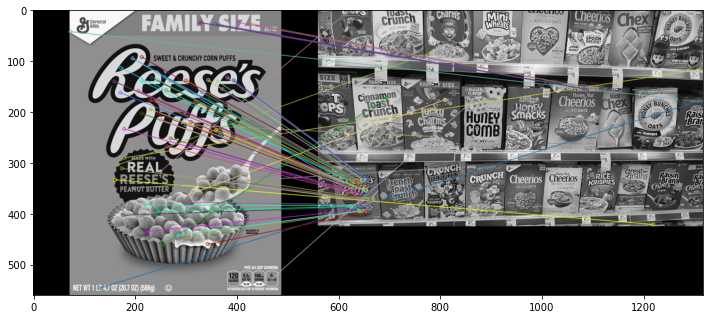

In [51]:
display(sift_matches)

In [52]:
sift = cv2.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reese,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [53]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)


In [54]:
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [55]:
matchesMask = [[0,0] for i in range(len(matches))]

In [56]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]



In [57]:
draw_prams = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags = 0)

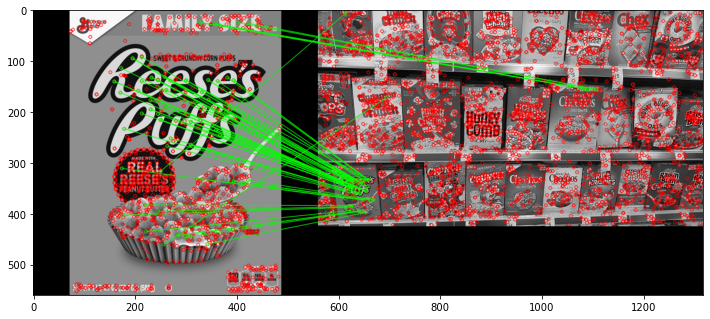

In [58]:
flann_matches = cv2.drawMatchesKnn(reese,kp1,cereals,kp2,matches,None,**draw_prams)
display(flann_matches)

### 7. Watershed Algorithm
* Use to segment image
* Change image to binary and find the border beetween heavy and light color

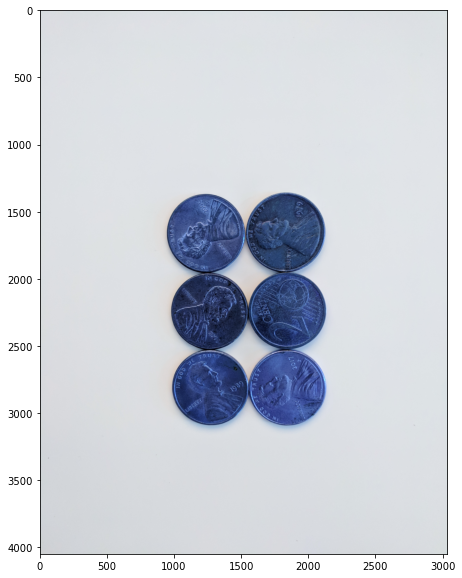

In [59]:
sep_coin = cv2.imread('DATA/pennies.jpg')
display(sep_coin)

* We want to detect the coin so the coin detail and color is not neccessary

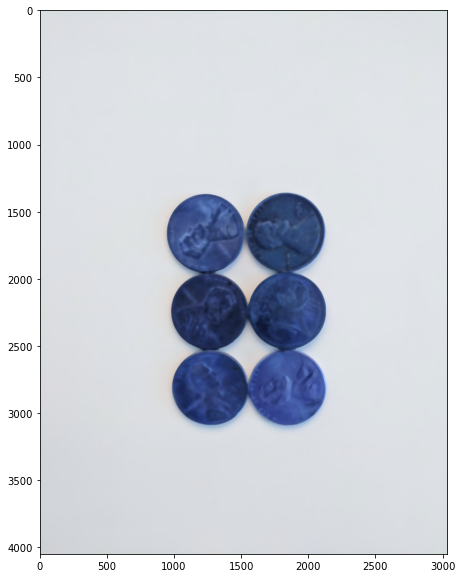

In [60]:
#mesina blur
sep_blur = cv2.medianBlur(sep_coin,25)
display(sep_blur)

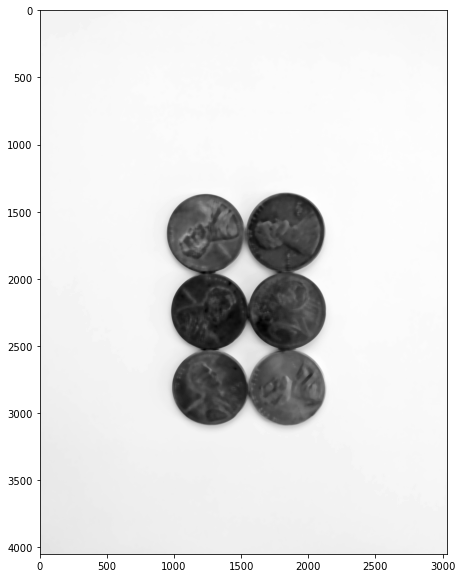

In [61]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

* Perform binary threshold

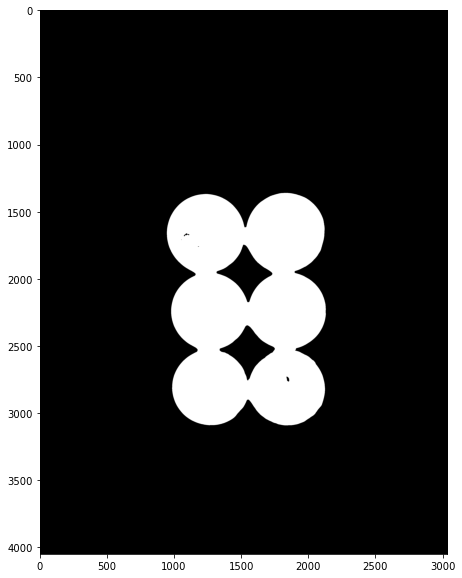

In [62]:
ret,sep_thresh = cv2.threshold(gray_sep_coins,150,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [63]:
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

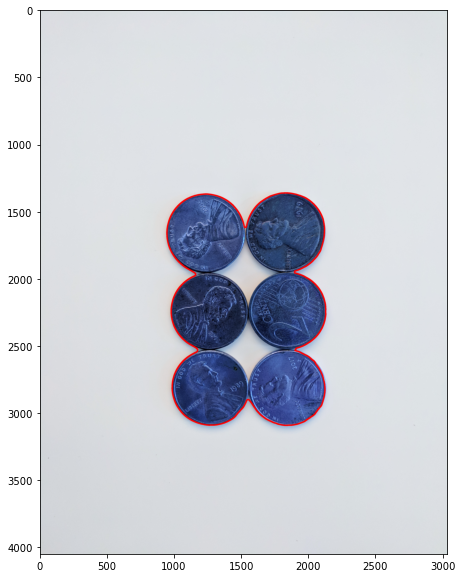

In [64]:
# find contuor
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coin,contours,i,(255,0,0),10)
display(sep_coin)

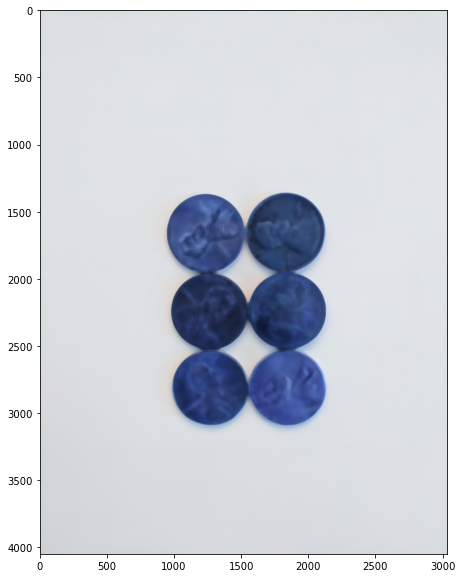

In [65]:
img = cv2.imread('DATA/pennies.jpg')
img = cv2.medianBlur(img,35)
display(img)

* Change image to grayscale, because it is binary so effect is not clear, but the watershed work better in grayscale image

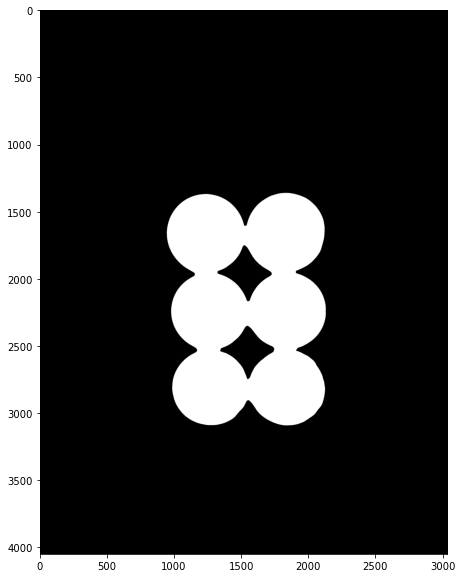

In [66]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

* Dilate the contour and egde by morphologyEx
* If color is white -> tacke white, else black

In [67]:
kernel = np.ones((3,2),np.uint8)

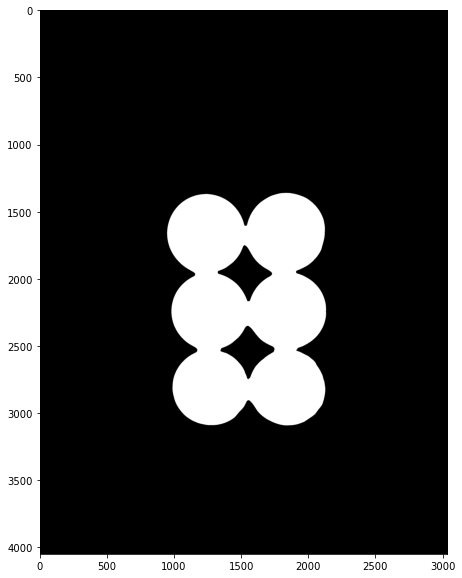

In [68]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

* find surely background

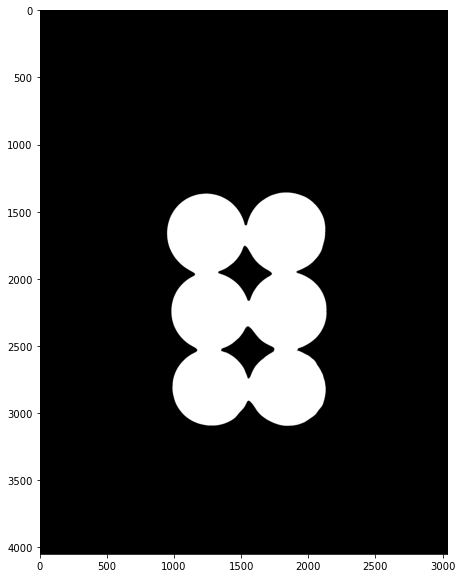

In [69]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg,cmap='gray')

* find picture main frame with distanceTranform
* distanceTransform(src, dst, distanceType, maskSize)

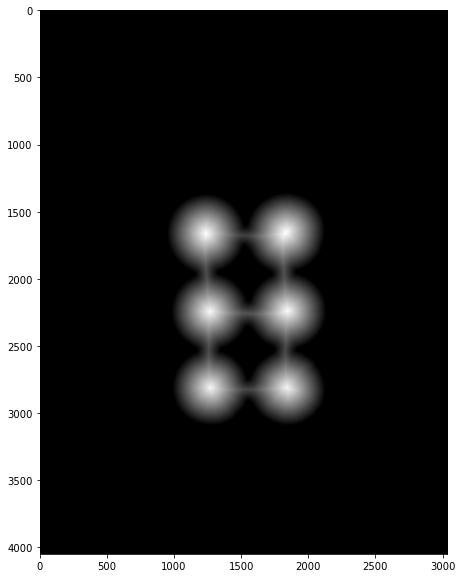

In [70]:
# distance transform
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_transform)

* Finding the surely frond ground 

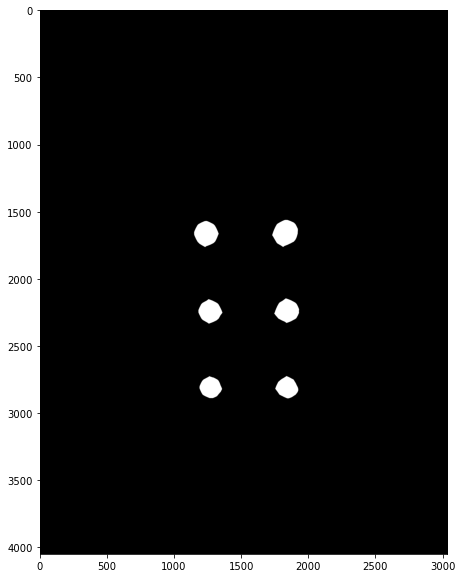

In [71]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg)

* find unknown region

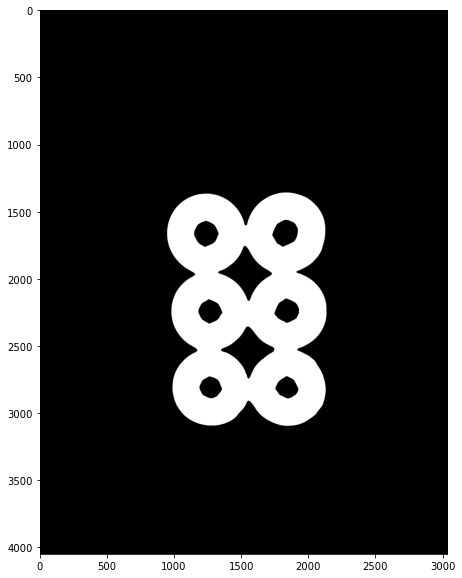

In [72]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

In [73]:
ret, markers = cv2.connectedComponents(sure_fg)
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

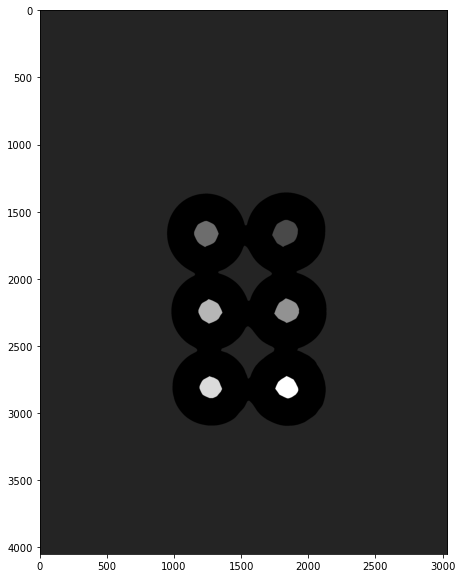

In [74]:
markers = markers + 1
markers[unknown==255] = 0
display(markers)

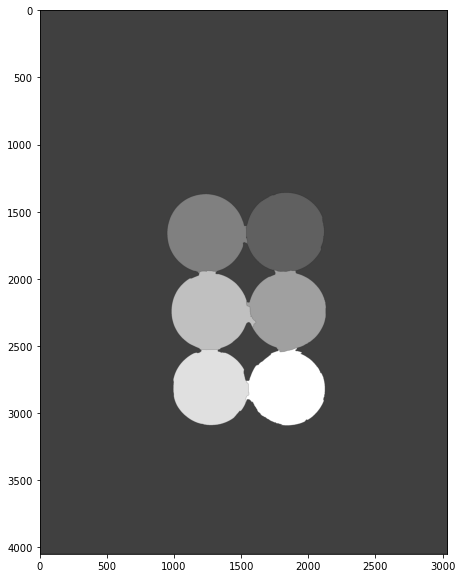

In [75]:
markers = cv2.watershed(img,markers)
display(markers)

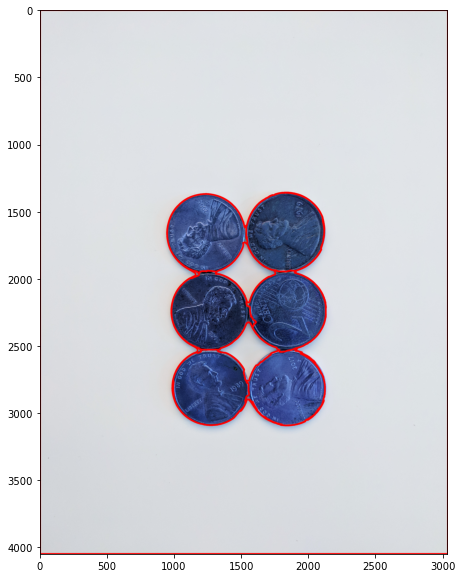

In [76]:
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coin,contours,i,(255,0,0),10)
display(sep_coin)

In [77]:
# Clicking watershed
road = cv2.imread('DATA/road_image.jpg')
road_copy = road.copy()
road.shape[:2]

(600, 800)

In [78]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)
segment = np.zeros(road.shape,dtype = np.uint8)
segment.shape

(600, 800, 3)

In [79]:
from matplotlib import cm
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [80]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [81]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [82]:
###
####
# COLOR CHOICE
current_marker = 1
#MARKER_UPDATE BY WATERSHED
mark_updates = False
n_markers = 10
#CALLBACK
def mouse_callback(event,x,y,flags,param):
    global mark_updates
    if event == cv2.EVENT_LBUTTONDBLCLK:
        # Marker pass to watershed
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)

        # user see on the road image
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)

        mark_updates = True


# Loop
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image',mouse_callback)

while True:
    cv2.imshow('Watershed Segment',segment)
    cv2.imshow('Road Image',road_copy)

    k = cv2.waitKey(1)

    if k == ord('q'):
        break

    # clear all color when press c key
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2],dtype=np.int32)
        segment = np.zeros(road.shape,dtype=np.uint8)

    # update color choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))

    #update marking:
    if mark_updates:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        segment = np.zeros(road.shape,dtype = np.uint8)

        for color_ind in range(n_markers):
            segment[marker_image_copy==(color_ind)] = colors[color_ind] 
cv2.destroyAllWindows()

### 8 Face Detection with haar cascade

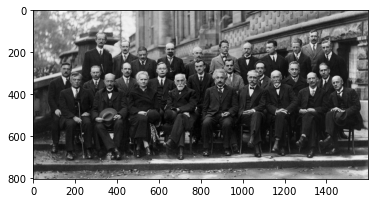

In [83]:
nadia  = cv2.imread('DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('DATA/solvay_conference.jpg',0)
plt.imshow(solvay,cmap='gray')

In [84]:
face_cascade = cv2.CascadeClassifier('DATA\haarcascades\haarcascade_frontalface_default.xml')

In [85]:
def detect_face(img):
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,h,w) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

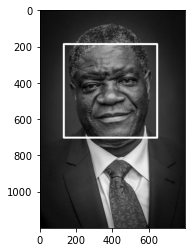

In [87]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

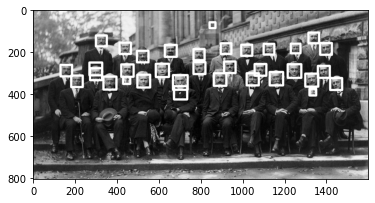

In [88]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [96]:
def adj_detect_face(img):
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)

    for (x,y,h,w) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

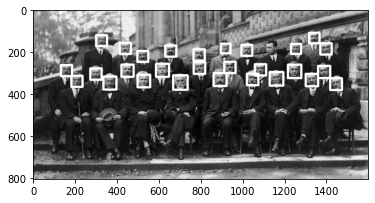

In [97]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [98]:
eye_cascade = cv2.CascadeClassifier('DATA\haarcascades\haarcascade_eye.xml')

In [99]:
def detect_eyes(img):
    face_img = img.copy()

    eye_rects = eye_cascade.detectMultiScale(face_img)

    for (x,y,h,w) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

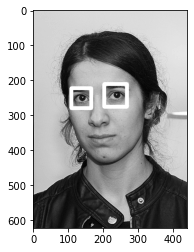

In [102]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

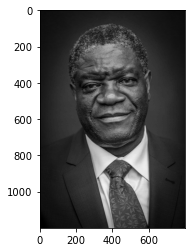

In [103]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [105]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)

    frame = detect_face(frame)

    cv2.imshow('Video Face Detect',frame)

    k = cv2.waitKey(1)

    if k==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()